<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula01_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

def criaDatasetBidimensionalBinário(n=20, slop=[2, 1], intercept=-0.4):
    X = np.random.uniform(size=(n,2))
    AUX = np.multiply(X, slop)-[0, intercept]
    y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
    return X, y

slop = [2, 1]
intercept = -0.4
Xtr, ytr = criaDatasetBidimensionalBinário(n=20, slop=slop, intercept=intercept)
Xtr, ytr

(array([[0.17304269, 0.09475413],
        [0.0153133 , 0.33828546],
        [0.02762434, 0.85792785],
        [0.27686951, 0.02414804],
        [0.37210374, 0.18792459],
        [0.47147209, 0.7901484 ],
        [0.10361979, 0.40890418],
        [0.33000537, 0.5308665 ],
        [0.62253594, 0.59854448],
        [0.2151277 , 0.43467557],
        [0.12192893, 0.24564981],
        [0.7942632 , 0.36742523],
        [0.21644092, 0.82420489],
        [0.80369017, 0.87574039],
        [0.96538586, 0.52923252],
        [0.83894925, 0.22615627],
        [0.99763599, 0.5173455 ],
        [0.93873527, 0.59427627],
        [0.89154862, 0.28184358],
        [0.44896489, 0.59329791]]),
 array([-1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,
         1,  1, -1]))

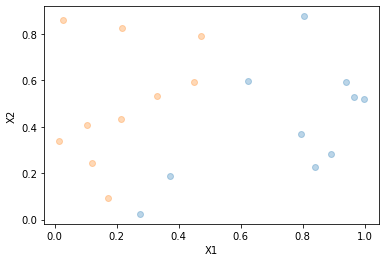

In [2]:
import matplotlib.pyplot as plt

def plotaDatasetBidimensional(X, y):
    """
    Plota um dataset bidimensional.
    """
    plt.xlabel('X1')
    plt.ylabel('X2')
    for k in set(y):
        plt.plot(X[:,0][y==k],X[:,1][y==k], "o", alpha=0.3)

plotaDatasetBidimensional(Xtr, ytr)

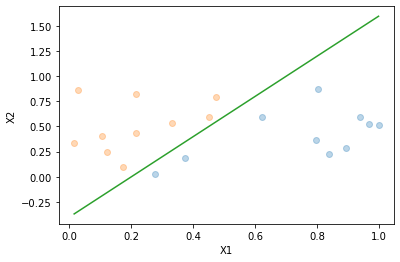

In [3]:
def plotaHiperplanoDatasetBidimensional(X, y, vetor, intercept=0):
    """
    Plota um dataset bidimensional com um hiperplano definido por um
    vetor e o valor em que este vetor intercepta o eixo vertical.
    """
    x0min = min(X[:,0])
    x0max = max(X[:,0])
    xs = np.linspace(x0min, x0max, num=2)
    ys = (-vetor[0] / vetor[1]) * xs - intercept / vetor[1]
    plt.plot(xs,ys)

plotaDatasetBidimensional(Xtr, ytr)
vetor_hyperplano = np.array(slop) * np.array([1, -1])
plotaHiperplanoDatasetBidimensional(Xtr, ytr, vetor_hyperplano, intercept)

In [4]:
def sign(a):
  return (a >= 0) * 2 - 1

In [5]:
def accuracy(yactual, ypred):
  return sum(yactual == ypred)/len(yactual)

1.0
[ -8.30111018  31.70472839 -15.15826753]


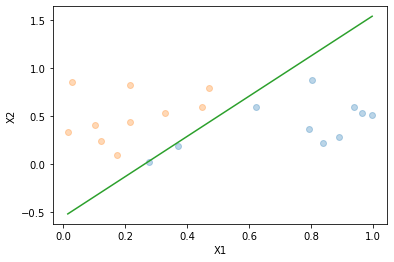

In [6]:
from sklearn.base import BaseEstimator, ClassifierMixin
import random

def include_bias(X):
  bias = np.ones((X.shape[0], 1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
     self.w = None
     self.activation = sign
     self.max_iter = max_iter

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(-1, 1, size=Xb.shape[1])
    for _ in range(self.max_iter):
      ypred = self.predict(X)
      erros = y - ypred
      custo = sum(erros**2)
      if custo == 0:
        break
      self.w += Xb.T @ erros

  def predict(self, X):
    Xb = include_bias(X)
    a = Xb @ self.w
    ypred = self.activation(a)
    return ypred

perceptron = Perceptron()
perceptron.fit(Xtr, ytr)
print(accuracy(ytr, perceptron.predict(Xtr)))
print(perceptron.w)
plotaDatasetBidimensional(Xtr, ytr)
plotaHiperplanoDatasetBidimensional(Xtr, ytr, perceptron.w[1:], perceptron.w[0])


0.951


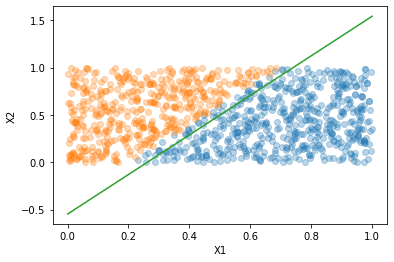

In [7]:
Xte, yte = criaDatasetBidimensionalBinário(1000)
print(accuracy(yte, perceptron.predict(Xte)))
plotaDatasetBidimensional(Xte, yte)
plotaHiperplanoDatasetBidimensional(Xte, yte, perceptron.w[1:], perceptron.w[0])

In [8]:
# resposta, usando SVM

from sklearn.svm import LinearSVC

classifier = LinearSVC()
classifier.fit(Xtr, ytr)
print(accuracy(ytr, classifier.predict(Xtr)))

0.95
